In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
bench = pd.read_csv('D:/ISL-MAJOR-PROJECT/dataset/benchpress_coords.csv')
squat = pd.read_csv('D:/ISL-MAJOR-PROJECT/dataset/squat_coords.csv')
deadlift = pd.read_csv('D:/ISL-MAJOR-PROJECT/dataset/deadlift_coords.csv')

In [4]:
# Angle calculation function
def calculateAngle(a, b, c):
    a = np.array(a)  # First point
    b = np.array(b)  # Middle point
    c = np.array(c)  # End point

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(
        a[1] - b[1], a[0] - b[0]
    )
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

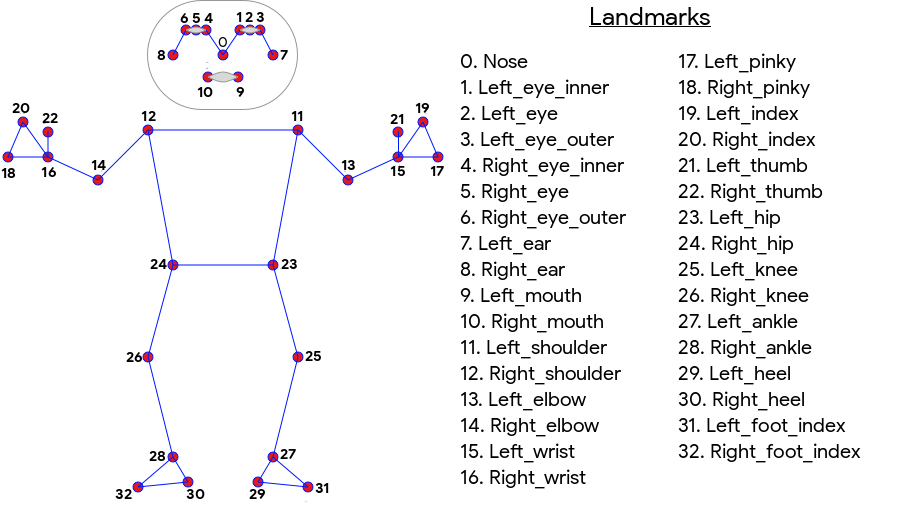

In [ ]:
# Nose: x1, y1
# Left shoulder: x12, y12, Left elbow: x14, y14, Left wrist: x16, y16, Left ankle: x28, y28, Left heel: x30, y30
# Right shoulder: x13, y13, Right elbow: x15, y15, Right wrist: x17, y17, Right ankle: x29, y29, Right heel: x31, y31

In [5]:
def extract_joint_coordinates(df):
    nose = []
    left_shoulder = []
    left_elbow = []
    left_wrist = []
    left_hip = []
    left_knee = []
    left_ankle = []
    left_heel = []
    right_shoulder = []
    right_elbow = []
    right_wrist = []
    right_hip = []
    right_knee = []
    right_ankle = []
    right_heel = []

    for i in range(len(df)):
        nose.append([df['x1'].values[i], df['y1'].values[i]])
        left_shoulder.append([df['x12'].values[i], df['y12'].values[i]])
        left_elbow.append([df['x14'].values[i], df['y14'].values[i]])
        left_wrist.append([df['x16'].values[i], df['y16'].values[i]])
        left_hip.append([df['x26'].values[i], df['y26'].values[i]])
        left_knee.append([df['x28'].values[i], df['y28'].values[i]])
        left_ankle.append([df['x30'].values[i], df['y30'].values[i]])
        left_heel.append([df['x32'].values[i], df['y32'].values[i]])
        right_shoulder.append([df['x13'].values[i], df['y13'].values[i]])
        right_elbow.append([df['x15'].values[i], df['y15'].values[i]])
        right_wrist.append([df['x17'].values[i], df['y17'].values[i]])
        right_hip.append([df['x27'].values[i], df['y27'].values[i]])
        right_knee.append([df['x29'].values[i], df['y29'].values[i]])
        right_ankle.append([df['x31'].values[i], df['y31'].values[i]])
        right_heel.append([df['x33'].values[i], df['y33'].values[i]])

    return nose, left_shoulder, left_elbow, left_wrist, left_hip, left_knee, left_ankle, left_heel, right_shoulder, right_elbow, right_wrist, right_hip, right_knee, right_ankle, right_heel

In [6]:
# Extract joint coordinate values
nose, left_shoulder, left_elbow, left_wrist, left_hip, left_knee, left_ankle, left_heel, right_shoulder, right_elbow, right_wrist, right_hip, right_knee, right_ankle, right_heel = extract_joint_coordinates(bench)

# Output the results
print("Nose:", nose[:5])
print("Left shoulder:", left_shoulder[:5])
print("Left elbow:", left_elbow[:5])
print("Left wrist:", left_wrist[:5])
print("Left hip:", left_hip[:5])
print("Left knee:", left_knee[:5])
print("Left ankle:", left_ankle[:5])
print("Left heel:", left_heel[:5])
print("Right shoulder:", right_shoulder[:5])
print("Right elbow:", right_elbow[:5])
print("Right wrist:", right_wrist[:5])
print("Right hip:", right_hip[:5])
print("Right knee:", right_knee[:5])
print("Right ankle:", right_ankle[:5])
print("Right heel:", right_heel[:5])

Nose: [[np.float64(0.342405319), np.float64(0.293186635)], [np.float64(0.347208589), np.float64(0.290650994)], [np.float64(0.338909209), np.float64(0.297234207)], [np.float64(0.342314661), np.float64(0.286978781)], [np.float64(0.337070137), np.float64(0.29207471)]]
Left shoulder: [[np.float64(0.441123724), np.float64(0.33863911)], [np.float64(0.448362559), np.float64(0.342661023)], [np.float64(0.453106374), np.float64(0.344025701)], [np.float64(0.43198657), np.float64(0.343415648)], [np.float64(0.456074268), np.float64(0.342719615)]]
Left elbow: [[np.float64(0.542586923), np.float64(0.260587037)], [np.float64(0.537568986), np.float64(0.402204007)], [np.float64(0.569633663), np.float64(0.355730087)], [np.float64(0.521948993), np.float64(0.407967269)], [np.float64(0.545381069), np.float64(0.276529819)]]
Left wrist: [[np.float64(0.577421725), np.float64(0.189344153)], [np.float64(0.620806277), np.float64(0.429135859)], [np.float64(0.589851379), np.float64(0.325081736)], [np.float64(0.6301

In [7]:
neck_angle = [(calculateAngle(left_shoulder[i], nose[i], left_hip[i]) + calculateAngle(right_shoulder[i], nose[i], right_hip[i])) / 2 for i in range(len(nose))]
left_elbow_angle = [calculateAngle(left_shoulder[i], left_elbow[i], left_wrist[i]) for i in range(len(left_shoulder))]
right_elbow_angle = [calculateAngle(right_shoulder[i], right_elbow[i], right_wrist[i]) for i in range(len(right_shoulder))]
left_shoulder_angle = [calculateAngle(left_elbow[i], left_shoulder[i], left_hip[i]) for i in range(len(left_elbow))]
right_shoulder_angle = [calculateAngle(right_elbow[i], right_shoulder[i], right_hip[i]) for i in range(len(right_elbow))]
left_hip_angle = [calculateAngle(left_shoulder[i], left_hip[i], left_knee[i]) for i in range(len(left_shoulder))]
right_hip_angle = [calculateAngle(right_shoulder[i], right_hip[i], right_knee[i]) for i in range(len(right_shoulder))]
left_knee_angle = [calculateAngle(left_hip[i], left_knee[i], left_ankle[i]) for i in range(len(left_hip))]
right_knee_angle = [calculateAngle(right_hip[i], right_knee[i], right_ankle[i]) for i in range(len(right_hip))]
left_ankle_angle = [calculateAngle(left_knee[i], left_ankle[i], left_heel[i]) for i in range(len(left_knee))]
right_ankle_angle = [calculateAngle(right_knee[i], right_ankle[i], right_heel[i]) for i in range(len(right_knee))]

print("Neck angle:", neck_angle)
print("Left elbow angle:", left_elbow_angle)
print("Right elbow angle:", right_elbow_angle)
print("Left shoulder angle:", left_shoulder_angle)
print("Right shoulder angle:", right_shoulder_angle)
print("Left hip angle:", left_hip_angle)
print("Right hip angle:", right_hip_angle)
print("Left knee angle:", left_knee_angle)
print("Right knee angle:", right_knee_angle)
print("Left ankle angle:", left_ankle_angle)
print("Right ankle angle:", right_ankle_angle)

Neck angle: [np.float64(52.66332400483444), np.float64(52.169612974385146), np.float64(46.33807826915029), np.float64(52.242528272570894), np.float64(48.34841954897434), np.float64(39.28942533326622), np.float64(40.250994785942346), np.float64(46.037312200240166), np.float64(45.049550667603576), np.float64(44.694462787952524), np.float64(46.349586905290124), np.float64(42.93563274534611), np.float64(55.29749398975225), np.float64(46.33807826915029), np.float64(49.99356968208356), np.float64(44.601107264896775), np.float64(37.81994540560613), np.float64(35.192287508667036), np.float64(37.959001800844426), np.float64(43.44586450295592), np.float64(36.042000170794275), np.float64(42.497578019670925), np.float64(47.22842328341635), np.float64(49.690476874159714), np.float64(45.81698112634536), np.float64(48.85761142968918), np.float64(42.10964348896727), np.float64(33.75131807728264), np.float64(41.402142005104295), np.float64(43.728003038080686), np.float64(34.13273615435165), np.float64(

In [8]:
def calculate_joint_angles(row):
    nose = [row['x1'], row['y1']]
    left_shoulder = [row['x12'], row['y12']]
    left_elbow = [row['x14'], row['y14']]
    left_wrist = [row['x16'], row['y16']]
    left_hip = [row['x26'], row['y26']]
    left_knee = [row['x28'], row['y28']]
    left_ankle = [row['x30'], row['y30']]
    left_heel = [row['x32'], row['y32']]
    right_shoulder = [row['x13'], row['y13']]
    right_elbow = [row['x15'], row['y15']]
    right_wrist = [row['x17'], row['y17']]
    right_hip = [row['x27'], row['y27']]
    right_knee = [row['x29'], row['y29']]
    right_ankle = [row['x31'], row['y31']]
    right_heel = [row['x33'], row['y33']]

    neck_angle = (calculateAngle(left_shoulder, nose, left_hip) + calculateAngle(right_shoulder, nose, right_hip)) / 2
    left_elbow_angle = calculateAngle(left_shoulder, left_elbow, left_wrist)
    right_elbow_angle = calculateAngle(right_shoulder, right_elbow, right_wrist)
    left_shoulder_angle = calculateAngle(left_elbow, left_shoulder, left_hip)
    right_shoulder_angle = calculateAngle(right_elbow, right_shoulder, right_hip)
    left_hip_angle = calculateAngle(left_shoulder, left_hip, left_knee)
    right_hip_angle = calculateAngle(right_shoulder, right_hip, right_knee)
    left_knee_angle = calculateAngle(left_hip, left_knee, left_ankle)
    right_knee_angle = calculateAngle(right_hip, right_knee, right_ankle)
    left_ankle_angle = calculateAngle(left_knee, left_ankle, left_heel)
    right_ankle_angle = calculateAngle(right_knee, right_ankle, right_heel)

    return pd.Series([neck_angle, left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle, left_ankle_angle, right_ankle_angle])

# 1. bench

In [12]:
angle_columns = ['neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'left_knee_angle', 'right_knee_angle', 'left_ankle_angle', 'right_ankle_angle']
bench[angle_columns] = bench.apply(calculate_joint_angles, axis=1)

scaler = MinMaxScaler()
scaled_angles = scaler.fit_transform(bench[angle_columns])

scaled_angles_df = pd.DataFrame(scaled_angles, columns=angle_columns)

bench = pd.concat([bench, scaled_angles_df], axis=1)
bench.to_csv("benchpress_with_scaled_angles.csv", index=False)

In [9]:
bench

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,b_correct_up,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,-0.892839,0.994734,0.979807,0.611790,-0.042018,0.975278,0.725297,0.738664,-1.020206,0.997877
1,b_correct_down,0.347209,0.290651,0.494753,0.999993,0.336074,0.285710,0.560588,0.999994,0.336740,...,-0.707418,0.985596,0.972952,0.608905,-0.118859,0.956751,0.724160,0.736117,-0.862484,0.994825
2,b_correct_down,0.338909,0.297234,0.494922,0.999994,0.325614,0.295111,0.539178,0.999996,0.326345,...,-0.764271,0.978585,0.978824,0.608172,-0.101540,0.941800,0.723257,0.737576,-0.921502,0.993139
3,b_correct_down,0.342315,0.286979,0.466467,0.999992,0.325819,0.285868,0.529371,0.999994,0.325422,...,-0.635539,0.980626,0.981234,0.604804,-0.016468,0.940290,0.719281,0.736312,-0.785139,0.994317
4,b_correct_up,0.337070,0.292075,0.581475,0.999998,0.329630,0.290616,0.630095,0.999999,0.331256,...,-0.825383,0.985708,0.987015,0.609234,-0.114778,0.966898,0.723577,0.738962,-0.948455,0.994775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,b_arms_spread_up,0.500457,0.332783,0.996892,0.999999,0.506787,0.333955,1.058622,0.999999,0.513633,...,-0.032584,0.959229,0.776965,0.717337,-0.119467,0.918600,0.156478,0.707098,-0.148519,0.966602
951,b_arms_spread_down,0.488321,0.333411,0.733146,0.999999,0.498321,0.332653,0.785400,0.999998,0.506534,...,0.061520,0.947144,0.776348,0.717300,-0.012034,0.908701,0.156493,0.707005,-0.038739,0.944325
952,b_arms_spread_up,0.498022,0.333640,0.973929,0.999999,0.506430,0.336421,1.041684,0.999999,0.513856,...,-0.014260,0.968615,0.775779,0.718075,-0.077185,0.930802,0.155893,0.708278,-0.145761,0.971009
953,b_arms_spread_down,0.488116,0.334518,0.811987,0.999999,0.498652,0.334236,0.865367,0.999999,0.506627,...,0.082825,0.960492,0.776479,0.717409,0.034337,0.933673,0.156865,0.707450,0.001494,0.963094


# Squat

In [10]:
angle_columns = ['neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'left_knee_angle', 'right_knee_angle', 'left_ankle_angle', 'right_ankle_angle']
squat[angle_columns] = squat.apply(calculate_joint_angles, axis=1)

scaler = MinMaxScaler()
scaled_angles = scaler.fit_transform(squat[angle_columns])

scaled_angles_df = pd.DataFrame(scaled_angles, columns=angle_columns)

squat = pd.concat([squat, scaled_angles_df], axis=1)
squat.to_csv("squat_with_scaled_angles.csv", index=False)
squat

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,s_spine_neutral_down,0.578854,0.459936,-0.178820,0.999752,0.594528,0.448642,-0.173299,0.999830,0.594286,...,0.473151,0.157172,0.082760,0.664045,0.632192,0.623458,0.735855,0.643395,0.215085,0.169479
1,s_spine_neutral_down,0.590740,0.410155,-0.341654,0.999727,0.595270,0.397050,-0.327615,0.999847,0.594844,...,0.259501,0.160394,0.057948,0.737723,0.826643,0.567328,0.847129,0.604051,0.345745,0.209380
2,s_spine_neutral_up,0.572588,0.146920,-0.468999,0.999881,0.573966,0.125410,-0.442385,0.999909,0.573949,...,0.466283,0.202224,0.532266,0.326907,0.757030,0.760850,0.182410,0.474619,0.309183,0.246291
3,s_spine_neutral_up,0.563577,0.157547,-0.483738,0.999883,0.564866,0.136710,-0.457015,0.999882,0.564586,...,0.463763,0.241821,0.689043,0.153057,0.942900,0.791977,0.476066,0.441411,0.404384,0.242286
4,s_spine_neutral_down,0.579107,0.414149,-0.166554,0.999601,0.593653,0.400882,-0.152463,0.999702,0.593684,...,0.589990,0.169230,0.568255,0.614303,0.681567,0.611915,0.805155,0.606517,0.303724,0.156260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,s_caved_in_knees_up,0.536421,0.281407,-0.934153,0.999997,0.549575,0.269974,-0.917268,0.999992,0.557946,...,0.080879,0.185965,0.829249,0.841734,0.978188,0.910423,0.517978,0.296553,0.696990,0.708705
924,s_caved_in_knees_down,0.533027,0.469317,-0.860153,0.999945,0.544222,0.459746,-0.851478,0.999881,0.552527,...,0.007931,0.066402,0.605046,0.688496,0.409266,0.501970,0.767270,0.599725,0.604327,0.611473
925,s_caved_in_knees_up,0.543844,0.260963,-0.879605,0.999995,0.557127,0.249044,-0.863602,0.999988,0.564781,...,0.118883,0.252268,0.830593,0.862971,0.924141,0.788298,0.485633,0.229119,0.728003,0.798245
926,s_caved_in_knees_down,0.539253,0.457060,-0.993367,0.999991,0.551170,0.446189,-0.977970,0.999981,0.559808,...,0.008683,0.067762,0.622486,0.688549,0.350446,0.502204,0.790471,0.567438,0.592310,0.626482


# Deadlift

In [11]:
angle_columns = ['neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'left_knee_angle', 'right_knee_angle', 'left_ankle_angle', 'right_ankle_angle']
deadlift[angle_columns] = deadlift.apply(calculate_joint_angles, axis=1)

scaler = MinMaxScaler()
scaled_angles = scaler.fit_transform(deadlift[angle_columns])

scaled_angles_df = pd.DataFrame(scaled_angles, columns=angle_columns)

deadlift = pd.concat([deadlift, scaled_angles_df], axis=1)
deadlift.to_csv("deadlift_with_scaled_angles.csv", index=False)
deadlift

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,d_correct_down,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,0.950996,0.913755,0.330785,0.072821,0.911086,0.523603,0.723386,0.641266,0.253202,0.188200
1,d_correct_down,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,0.958239,0.949642,0.319952,0.298021,0.974792,0.436400,0.859024,0.313937,0.382163,0.008144
2,d_correct_down,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,0.812687,0.915737,0.437200,0.056541,0.573249,0.619935,0.644051,0.755962,0.332946,0.229628
3,d_correct_up,0.704687,0.148774,0.440767,0.995209,0.700908,0.139350,0.365987,0.995613,0.695389,...,0.950257,0.702023,0.360936,0.238497,0.805906,0.684383,0.470151,0.964177,0.173505,0.454810
4,d_correct_up,0.716225,0.146869,0.293682,0.998649,0.713821,0.136261,0.216470,0.998652,0.709841,...,0.867695,0.856630,0.376617,0.257785,0.956371,0.600696,0.615876,0.918872,0.238097,0.495850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,d_arms_narrow_down,0.423258,0.467540,-0.738914,0.999999,0.442992,0.451831,-0.747274,0.999997,0.453844,...,0.561735,0.886898,0.295301,0.367973,0.736614,0.844911,0.763663,0.682993,0.713810,0.336401
1136,d_arms_narrow_down,0.419347,0.455804,-0.551248,0.999999,0.440416,0.439564,-0.561443,0.999997,0.450906,...,0.522973,0.890998,0.302985,0.337825,0.739958,0.839972,0.661376,0.689986,0.633226,0.354367
1137,d_arms_narrow_down,0.412521,0.476321,-0.622205,0.999999,0.431973,0.462884,-0.633574,0.999997,0.442958,...,0.621398,0.884177,0.264897,0.417728,0.733090,0.755522,0.742157,0.711764,0.652813,0.365253
1138,d_arms_narrow_down,0.411704,0.494523,-0.582164,0.999999,0.431118,0.480473,-0.596455,0.999998,0.441991,...,0.686024,0.892699,0.318695,0.381109,0.624793,0.820471,0.779375,0.675796,0.720624,0.337550
